# imports boilerplate

In [1]:
%load_ext autoreload
%autoreload 2
packages = !conda list
len(packages),packages

(455,
 ['# packages in environment at /Users/brucecottman/anaconda3:',
  '#',
  '# Name                    Version                   Build  Channel',
  '_anaconda_depends         2019.10                  py37_0  ',
  '_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  ',
  'absl-py                   0.7.0                    pypi_0    pypi',
  'alabaster                 0.7.12                   py37_0  ',
  'altair                    4.0.0                    pypi_0    pypi',
  'anaconda                  custom                   py37_1  ',
  'anaconda-client           1.7.2                    py37_0  ',
  'anaconda-navigator        1.9.6                    py37_0  ',
  'anaconda-project          0.8.2                    py37_0  ',
  'appdirs                   1.4.3                    pypi_0    pypi',
  'appnope                   0.1.0                    py37_0  ',
  'appscript                 1.0.1            py37h1de35cc_1  ',
  'argh                      0.26.2                 

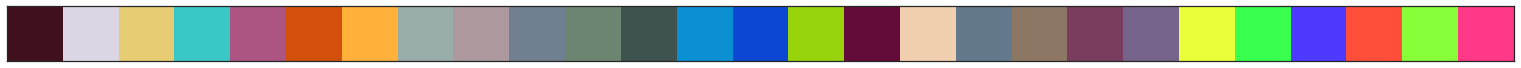

In [2]:
from __future__ import print_function
import matplotlib
import matplotlib.dates as mdates
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sys, os
import io
from typing import Dict, Pattern

import seaborn as sns; sns.set()  # for plot styling
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
PALLET = ['#40111D', '#DCD5E4', '#E7CC74'
                 ,'#39C8C6', '#AC5583', '#D3500C'
                 ,'#FFB139', '#98ADA7', '#AD989E'
                 ,'#708090','#6C8570','#3E534D'

                 ,'#0B8FD3','#0B47D3','#96D30B'                 
                 ,'#630C3A','#F1D0AF','#64788B'                 
                 ,'#8B7764','#7A3C5D','#77648B'
                 ,'#eaff39','#39ff4e','#4e39ff'
                 ,'#ff4e39','#87ff39','#ff3987', ]
N_PALLET = len(PALLET)
sns.set_palette(PALLET)
sns.palplot(PALLET)

In [3]:
# add if you want to add google driveAssertionError
old__file__ = !pwd
__file__ =  old__file__  #!cd ../../NLP ;pwd
#__file__ = !pwd
#__file__ = '/gdrive/My Drive'

sys.path.append(__file__)
print(sys.path)
os.chdir(old__file__[0])
!pwd
__file__

['/Users/brucecottman/Documents/PROJECTS/FinMrkt/src', '/usr/local/Cellar/apache-spark/2.0.1/libexec/python', '/Users/brucecottman/Documents/PROJECTS/FinMrkt/src/$', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python37.zip', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload', '', '/Users/brucecottman/Library/Python/3.7/lib/python/site-packages', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/extensions', '/Users/brucecottman/.ipython', ['/Users/brucecottman/Documents/PROJECTS/FinMrkt/src']]
/Users/brucecottman/Documents/PROJECTS/FinMrkt/src


['/Users/brucecottman/Documents/PROJECTS/FinMrkt/src']

In [4]:
from base import FutureValue_, nppy_, return_fit, price_std, p_or_r_std
from pandas import to_datetime, DataFrame
from pandas.api.extensions import register_dataframe_accessor
from statistics import stdev
from pandas_datareader.data import DataReader

In [5]:
from numba import jit

# DF method \# 1 - monkey patching 

https://pandas.pydata.org/pandas-docs/version/0.15/faq.html#adding-features-to-your-pandas-installation

In [6]:
from pandas.core.base import PandasObject
def foo_function(df):
    x= 1
    return x



In [7]:
df = DataFrame()
len(dir(df))

450

In [8]:
PandasObject.foo_method = foo_function
PandasObject.foo_attribute = 1
PandasObject.foo_method2= foo_function
df = DataFrame()
len(dir(df))

453

In [9]:
df.foo_method()

1

# DF method \# 2 -

    """Register a function as a method attached to the Pandas DataFrame.
    Example
    -------
    for a function
        register_dataframe_method
        def row_by_value(df, col, value):
        return df[df[col] == value].squeeze()

    """

In [10]:
from pandas.core.dtypes.generic import ABCDataFrame
from pandas.api.extensions import register_dataframe_accessor
from functools import wraps
def register_DataFrame_method(method):
    def inner(*args, **kwargs):
        class AccessorMethod(object):
            def __init__(self, pandas_obj):
                self._obj = pandas_obj

            @wraps(method)
            def __call__(self, *args, **kwargs):
                return method(self._obj, *args, **kwargs)
        register_dataframe_accessor(method.__name__)(AccessorMethod)
        return method
    return inner()


In [11]:
df2 = DataFrame()
len(dir(df2))

453

In [12]:
@register_DataFrame_method
def foo_function21(df):
    x= 1
    return x

@register_DataFrame_method
def foo_function22(df):
    x= 1
    return x

@register_DataFrame_method
def foo_function23(df):
    x= 1
    return x

len(dir(df2))

len(dir(df2))

456

In [13]:

df2.foo_function23()

1

# offical method 

https://pandas.pydata.org/docs/development/extending.html

In [14]:
df3= DataFrame()
len(dir(df3)), dir(df3)

(456,
 ['T',
  '_AXIS_ALIASES',
  '_AXIS_IALIASES',
  '_AXIS_LEN',
  '_AXIS_NAMES',
  '_AXIS_NUMBERS',
  '_AXIS_ORDERS',
  '_AXIS_REVERSED',
  '_AXIS_SLICEMAP',
  '__abs__',
  '__add__',
  '__and__',
  '__array__',
  '__array_priority__',
  '__array_wrap__',
  '__bool__',
  '__bytes__',
  '__class__',
  '__contains__',
  '__copy__',
  '__deepcopy__',
  '__delattr__',
  '__delitem__',
  '__dict__',
  '__dir__',
  '__div__',
  '__doc__',
  '__eq__',
  '__finalize__',
  '__floordiv__',
  '__format__',
  '__ge__',
  '__getattr__',
  '__getattribute__',
  '__getitem__',
  '__getstate__',
  '__gt__',
  '__hash__',
  '__iadd__',
  '__iand__',
  '__ifloordiv__',
  '__imod__',
  '__imul__',
  '__init__',
  '__init_subclass__',
  '__invert__',
  '__ior__',
  '__ipow__',
  '__isub__',
  '__iter__',
  '__itruediv__',
  '__ixor__',
  '__le__',
  '__len__',
  '__lt__',
  '__matmul__',
  '__mod__',
  '__module__',
  '__mul__',
  '__ne__',
  '__neg__',
  '__new__',
  '__nonzero__',
  '__or__',
  '__po

In [15]:
@register_dataframe_accessor("longitudelatitude")
class GeoAccessor:
    def __init__(self, pandas_obj):
        self._validate(pandas_obj)
        self._obj = pandas_obj

    @staticmethod
    def _validate(obj):
        # verify there is a column latitude and a column longitude
        if "latitude" not in obj.columns or "longitude" not in obj.columns:
            raise AttributeError("Must have 'latitude' and 'longitude'.")

    @property
    def center(self):
        # return the geographic center point of this DataFrame
        lat = self._obj.latitude
        lon = self._obj.longitude
        return (float(lon.mean()), float(lat.mean()))

    def plot(self):
        # plot this array's data on a map, e.g., using Cartopy
        pass

In [16]:
df3 = DataFrame(
    {"longitude": np.linspace(0, 10, num=5), "latitude": np.linspace(0, 20, num=5)})


In [17]:

df3.longitudelatitude.center

(5.0, 10.0)

In [18]:
df3.longitudelatitude._obj

,longitude,latitude
0,0.0,0.0
1,2.5,5.0
2,5.0,10.0
3,7.5,15.0
4,10.0,20.0


In [19]:
(dir(df3))

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',

In [20]:

len(dir(df3))

459

In [28]:
dir(DataFrame())

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__Acme__foo',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__'

# Solving the Pandas DataFrame Namespace Problem - Sort of

In [21]:
str(hash(str(hash('new_method_name'))))

'-1294627893727325835'

In [26]:
@register_DataFrame_method
def __Acme__foo(df,high_limit):
    x = 0
    for iter in range(high_limit):
        x += 1
    return x


In [27]:
DataFrame().__Acme__foo(1000)

1000

# speedup using jit

In [ ]:
def slow_count_primes(df, high_limit:int) -> int:
    """ Vanilla python that returns the number of primes between 0 and [limit] """
    count:int = 0
    for candidate_int in range(high_limit):
        if (candidate_int > 1):
            for factor in range(2, candidate_int):
                if candidate_int % factor == 0:
                    break
                else:
                    count += 1
    return count

In [ ]:
PandasObject.slow_count_primes = slow_count_primes


In [ ]:
DataFrame().slow_count_primes(1_000_00)

In [ ]:
@jit
def fast_count_primes(df, limit:int) -> int:
    """ Vanilla python that returns the number of primes between 0 and [limit] """
    count:int = 0
    for candidate_int in range(limit):
        if (candidate_int > 1):
            for factor in range(2, candidate_int):
                if candidate_int % factor == 0:
                    break
                else:
                    count += 1
    return count

In [ ]:
PandasObject.fast_count_primes = fast_count_primes

In [ ]:
DataFrame().fast_count_primes(1_000_00)

In [ ]:
@register_DataFrame_method
@jit
def fast_count_primes2(df, limit:int) -> int:
    """ Vanilla python that returns the number of primes between 0 and [limit] """
    count:int = 0
    for candidate_int in range(limit):
        if (candidate_int > 1):
            for factor in range(2, candidate_int):
                if candidate_int % factor == 0:
                    break
                else:
                    count += 1
    return count

In [ ]:
DataFrame().fast_count_primes(1_000_00)